K-NN    
KNN은 이웃 데이터의 패턴을 기반으로 분류/예측하는 직관적인 모델   
K 값이 모델 성능에 큰 영향을 미치므로 최적의 K를 찾는 것이 중요   
K는 가장 가까운 이웃 데이터를 의미한다    
거리 기반 모델이므로 데이터 정규화가 필수   
대용량 데이터에서는 연산량이 많아 비효율적일 수 있다    
비선형 데이터에서도 강력한 성능을 발휘하지만, 차원이 많아지면 성능이 저하될 수 있다.   

In [33]:
# 필요한 패키지 설치
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
df = pd.read_excel("C:/Users/KimDongyoung/.cache/kagglehub/datasets/muratkokludataset/raisin-dataset/versions/1/Raisin_Dataset/Raisin_Dataset.xlsx")
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [35]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [36]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분리 (6:4)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [37]:
# 기본 K-nn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors = 3,
                                  weights='uniform',
                                  metric="minkowski")
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8981481481481481
0.8305555555555556


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighb

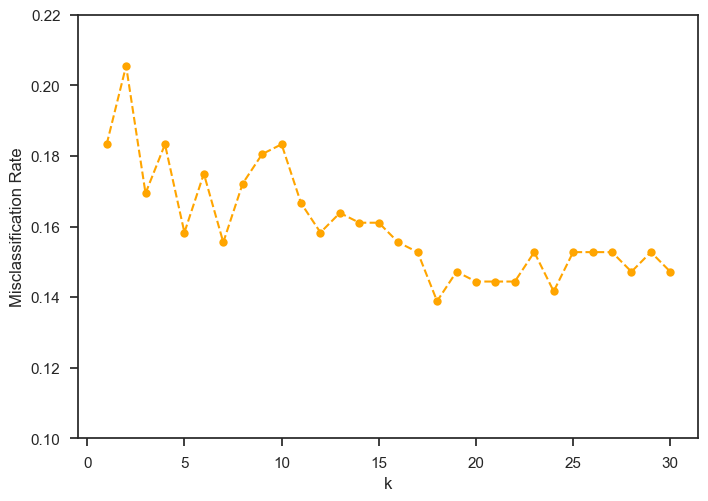

In [38]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.10, 0.22)
plt.show()

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [41]:
import os
import pandas as pd

# path 경로 내 파일 목록 확인
files = os.listdir(path)
print("폴더 내 파일 목록:", files)

# 예시: 첫 번째 csv 파일을 불러오기
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
  df = pd.read_csv(os.path.join(path, csv_files[0]))
  print(df.head())
else:
  print("csv 파일이 없습니다.")

폴더 내 파일 목록: ['Mall_Customers.csv']
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


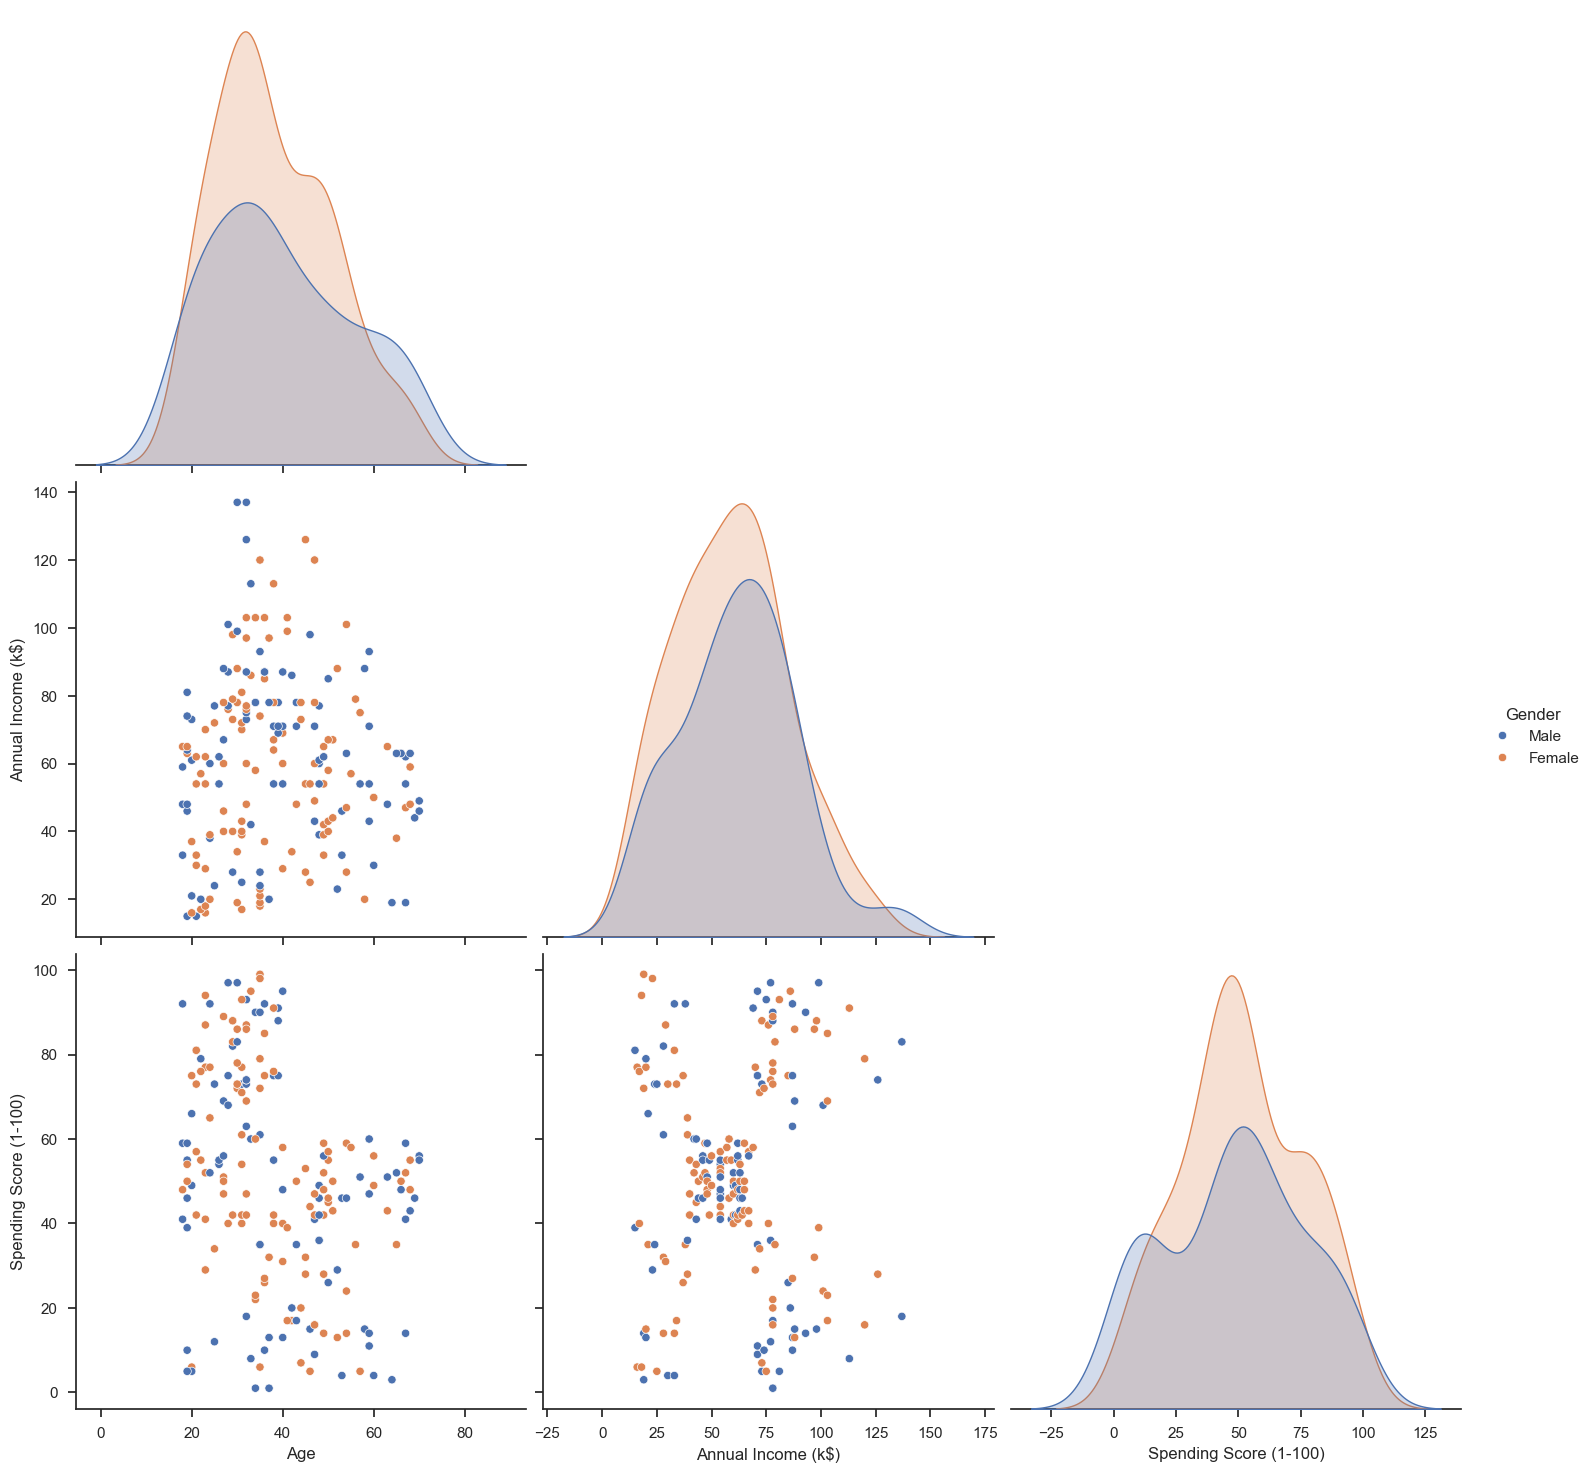

In [42]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop('CustomerID', axis=1)

sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(df1,
             diag_kind='kde', # 상관계수가 1이면 분포로 표시
             hue = 'Gender',
             corner=True,
             height = 5
            )
plot_kws={"s": 100}

plt.show()

In [43]:
# 데이터 스케일 정규화

# Gender변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ['Gender'],drop_first=True)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

# # 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [44]:
# k-means 클러스터링 모델 생성

kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(df_minmax)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)

# 반복 횟수
print(kmeans_model_1.n_iter_)

29.55285761194386
[[1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]
 [3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]]
10


<Axes: >

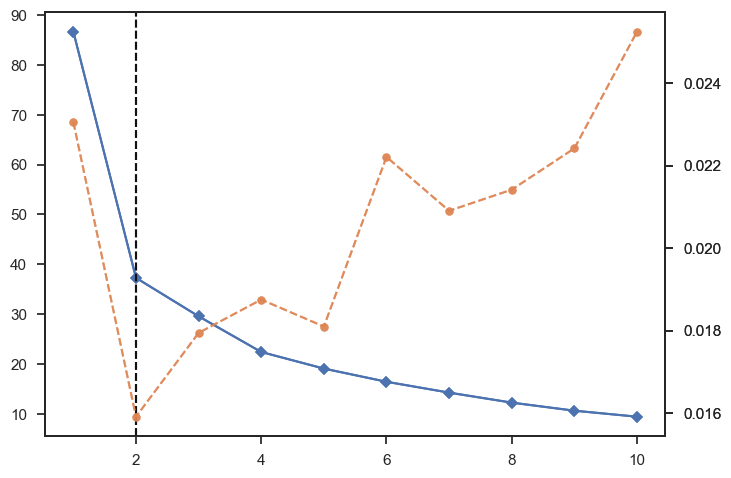

In [45]:
# 엘보우 차트 시각화

Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw()

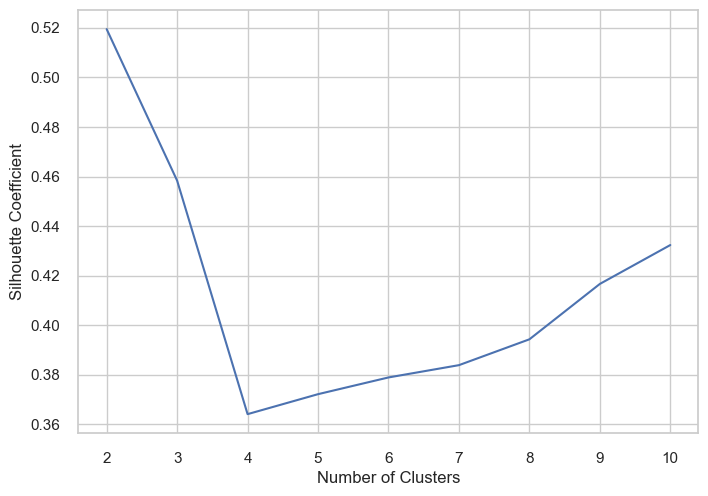

In [46]:
# 실루엣 계수 시각화 1

# k-means 모델 설정
kmeans_model_2 = {
       "init": "k-means++",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 37,
        }

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)

# Import seaborn for styling.
import seaborn as sns

# Apply the seaborn style before creating the plot.
sns.set_style('whitegrid')  # Use 'whitegrid' from seaborn

plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

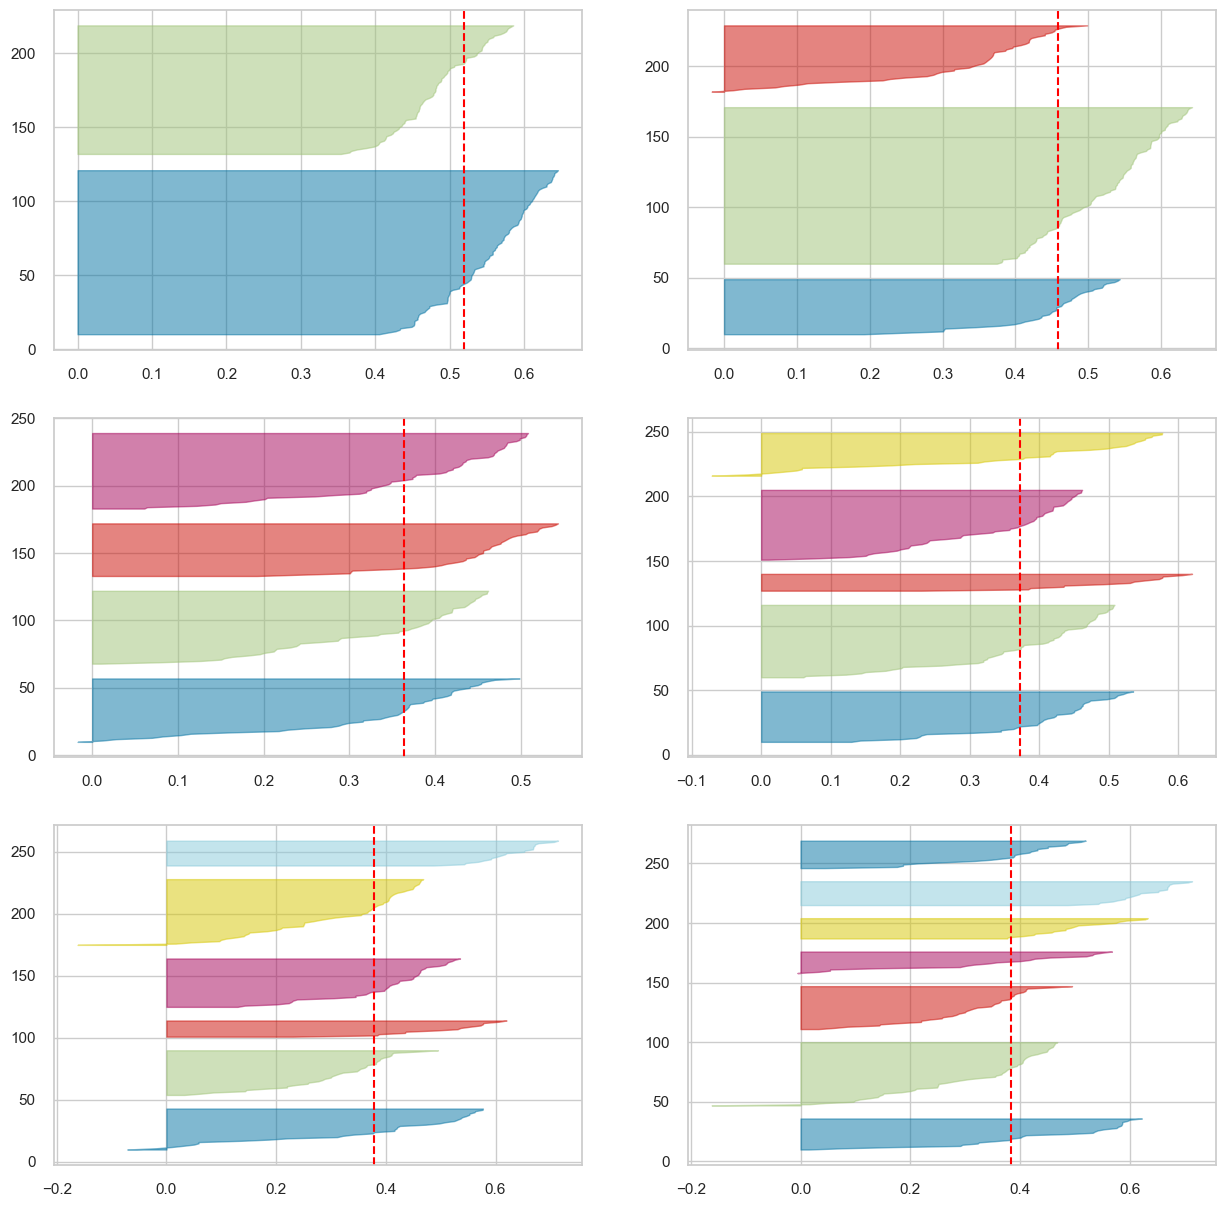

In [47]:
# 실루엣 계수 시각화 2

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:

# k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i,
                            init="k-means++",
                            n_init=10,
                            max_iter=300,
                            random_state=37)
    q, mod = divmod(i, 2)

# 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(kmeans_model_3,
                                      colors="yellowbrick",
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)